<h2 align="center"> Univariate Linear Regression </h2>

Objective of project - to implement linear regression with one variable,i.e., univariate to predict the profit for bike sharing company. 

### Task 2: Load the Data and Libraries
---

In [0]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




1. numpy - for scientific computing 
2. matplotlib, seaborn - for plotting and plot styling. Seaborn is built on top of matplotlib.
3. pandas - to manage our data 



In [4]:
data = pd.read_csv("/content/bike_sharing_data.txt")
data.head() #for first 5 rows

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233



Columns - 
1. Population - Population of cities in units of 10000.
2. Profit - Comapny make profit in corresponding city in units of 10000 dollar.



In [5]:
data.info() # for information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Task 3: Visualize the Data
---

We can use scatter plot because data is not multidimensional(more than 2 features).

Text(0.5, 1.0, 'Profit in $10000 vs City Population in 10000s')

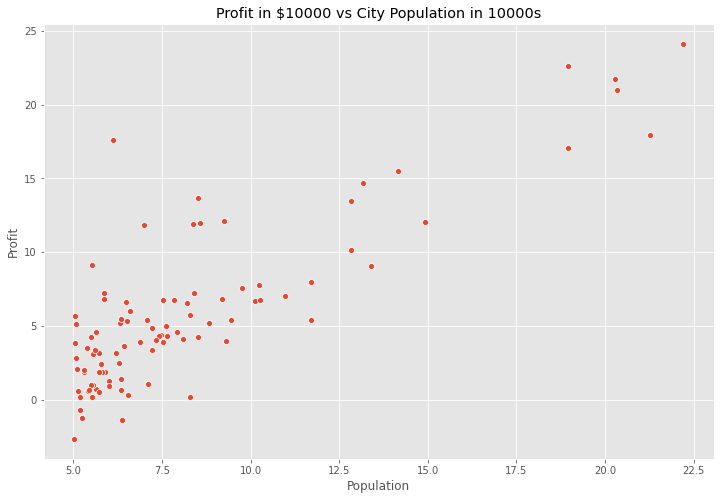

In [6]:
sp=sns.scatterplot(x="Population",y="Profit",data=data)
# set_title is in matplotlib...
sp.set_title("Profit in $10000 vs City Population in 10000s")

**Note** - 
We can see that there is a general trend in graph. There is a linear relationship between Population and Profit. 

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

**Note** - 

* We will fit the linear regression parameters to our dataset using gradient discent. The objective of linear regression is to minimize the cost function.
* X and Y are not scalar values.
* We do reshape to make our matrix dimaensions valid. 
  - Without reshape dimensions are - (97,)
  - With reshape dimensions are - (97,1)





**Deep Understanding of function cost_function** - 

* hθ(x(i)) - predicted value of y,
  y(i) - actual value of y

* Equation of line - 
y=mx+c

    where we can't change value of x and y. So we will predict value of m(θ0) and c(θ1).Initially, we will take m and c as (0,0).

    y = y_pred

    x = X=np.append(np.ones((m,1)),data.Population.values.reshape(m,1),axis=1 -> [[1,x1],  [1,x2],  [1,x3],...]

    m,c = theta = np.zeroes((2,1)) -> [[0],  [0]] -> [[c],  [m]]

* X=np.append(np.ones((m,1)),data.Population.values.reshape(m,1),axis=1) -> 
    
    [[1,x1],  [1,x2],  [1,x3],...] -> It is done so that when we multiply c with 1 then it comes c and when we multiply x1,x2,x3,... with m then it becomes x1*m,x2*m,x3*m,... and equation becomes y=(1*c)+(m*x)


* y_pred=X.dot(theta) -> 
    
    y_pred=[[1,x1],  [1,x2],  [1,x3],...].dot([[c],  [m]])

    y_pred=[[c+m*x1],  [c+m*x2],  [c+m*x3],...]




                                   


In [0]:
def cost_function(X, y, theta):
  m=len(y)
  y_pred=X.dot(theta)
  error=(y_pred-y) ** 2
  return 1/(2*m) * np.sum(error)

In [20]:
m=data.Population.values.size
X=np.append(np.ones((m,1)),data.Population.values.reshape(m,1),axis=1)
y=data.Profit.values.reshape(m,1)
theta=np.zeros((2,1))
cost_function(X, y, theta)

32.072733877455676

 **Note** - 

32.072733877455676 is the value of error. At this time, it is very high because we user gradient descet. When we will apply gradiet descent then cost_function value will get minimize and our model line will become more and more perfect.

### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).



* We will use Batch gradient descent algorithm to minimize cost_function value
* With each step gradient descent, the parameters of (θj) will come closer to optimal values which will achieve lowest value of cost_function. 

**Deep Understanding Of gradient_descent ** - 

* error=np.dot(X.transpose(),(y_pred-y)) ->

    Dimensions  -->>

    X -> (m,2)

    X.transpose() -> (2,m)

    y_pred-y -> (m,1)
    
    error = np.dot((2,m), (m,1)) -> (2,1)



In [0]:
def gradient_descent(X, y, theta, alpha, iterations):
  m=len(y)
  # costs will store value of all cost_functions
  costs=[]
  for i in range(iterations):
    y_pred=X.dot(theta)
    error=np.dot(X.transpose(),(y_pred-y))
    theta=theta-alpha* 1/m * error
    costs.append(cost_function(X,y,theta))
  return theta, costs

In [22]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=2000)

print("y= {} + {} x1".format(str(round(theta[0, 0], 2)), str(round(theta[1,0], 2))))

y= -3.79 + 1.18 x1


In [23]:
print(costs)

[6.737190464870006, 5.931593568604956, 5.901154707081388, 5.895228586444221, 5.89009494311733, 5.885004158443647, 5.879932480491418, 5.874879094762575, 5.869843911806386, 5.86482686531293, 5.859827889932181, 5.85484692057229, 5.849883892376588, 5.844938740722034, 5.840011401218361, 5.8351018097072265, 5.830209902261388, 5.825335615183863, 5.820478885007099, 5.815639648492154, 5.81081784262787, 5.806013404630044, 5.801226271940628, 5.796456382226898, 5.791703673380653, 5.786968083517396, 5.782249550975539, 5.777548014315596, 5.7728634123193805, 5.768195683989212, 5.76354476854712, 5.758910605434048, 5.754293134309077, 5.749692295048628, 5.745108027745684, 5.740540272709014, 5.735988970462381, 5.731454061743792, 5.726935487504702, 5.722433188909257, 5.717947107333528, 5.713477184364749, 5.709023361800549, 5.704585581648198, 5.700163786123856, 5.695757917651815, 5.691367918863751, 5.68699373259798, 5.682635301898707, 5.678292570015292, 5.673965480401506, 5.669653976714798, 5.6653580028155

### Task 6: Visualising the Cost Function $J(\theta)$
---

**Objective** - 

* Plot the costs over a 2-dimensional grid of θ0 and θ1 value. 





In [0]:
from mpl_toolkits.mplot3d import Axes3D

1. mplot3d -  to create projected 3-D visualization

In [0]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0),len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t=np.array([theta_0[i], theta_1[j]])
    cost_values[i,j] = cost_function(X, y, t)


1. theta_0 -> c

    theta_1 -> m

2. theta_0 = np.linespace(-10, 10, 100) -> 

    range = (-10,10)
    
    No. of values which theta_0 will give = 100




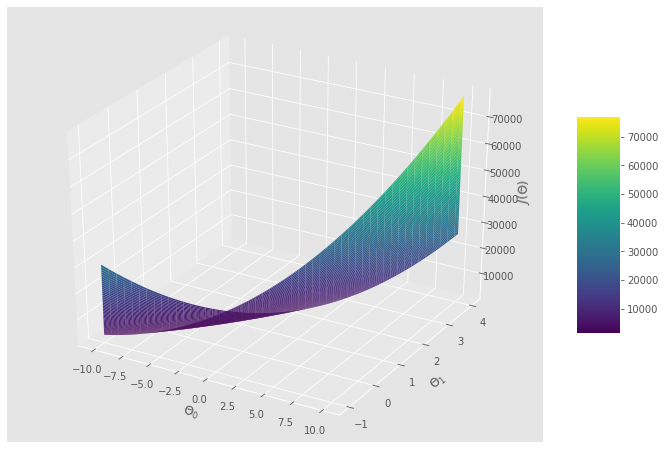

In [31]:
fig=plt.figure(figsize=(12,8))
ax=fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink = 0.5, aspect = 5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
# plt do not allow 3D. So we give zlabel in ax
ax.set_zlabel("$J(\Theta)$")
# to see 3D properly we rotate our graph by some angle 
# ax.view_init(30,330)

plt.show()

**Note**

* Now we will do projection of 3D plot on 2D plot 

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

**Objective** - 

Plotting the costs against the number of iterations. 

Text(0.5, 1.0, 'Values of the Cost Function over Iterations')

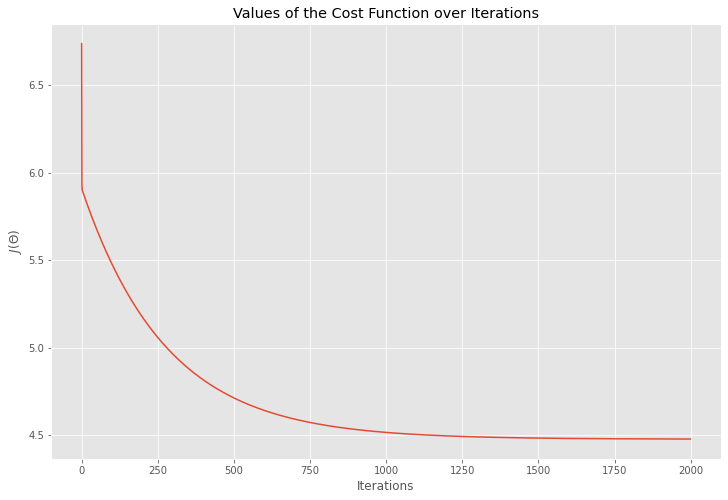

In [33]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function over Iterations")

### Task 8: Training Data with Linear Regression Fit
---

We got value of c(θ0) and m(θ1)

In [34]:
theta.shape

(2, 1)

In [35]:
theta

array([[-3.78806857],
       [ 1.18221277]])

In [36]:
theta = np.squeeze(theta)
print(theta)

[-3.78806857  1.18221277]


Text(0.5, 1.0, 'Linear Regression Fit')

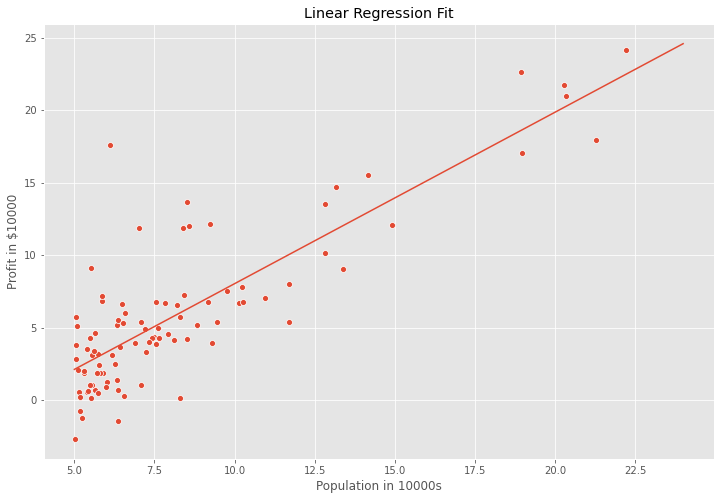

In [37]:
sns.scatterplot(x="Population", y="Profit", data=data)

x_value=[x for x in range(5,25)]
y_value=[(x*theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10000")
plt.title("Linear Regression Fit")

### Task 9: Inference using the optimized $\theta$ values
---

**bold text**$h_\theta(x) = \theta^Tx$

**Objective** - 

To make predictions or inferences on profits in cities that are outside from given range of our training data. 





* hθ(x) -> y_pred





In [0]:
def predict(x, theta):
  y_pred = np.dot(theta.transpose(),x)
  return y_pred

In [39]:
# take that 2 values of population which are not in range of training data 
y_pred_1=predict(np.array([1,4]), theta) * 10000
print("For a population of 40,000 people, the model predicts a profit of $"+str(round(y_pred_1,2)))

For a population of 40,000 people, the model predicts a profit of $9407.83


In [41]:
y_pred_2=predict(np.array([1,8.3]), theta) * 10000
print("For a population of 83,000 people, the model predicts a profit of $"+str(round(y_pred_2,2)))

For a population of 83,000 people, the model predicts a profit of $60242.97


# ***OR***

In [0]:
def predict1(x, theta):
  y_pred = np.dot(x.transpose(),theta)
  return y_pred

In [46]:
# take that 2 values of population which are not in range of training data 
y_pred_3=predict1(np.array([1,4]), theta) * 10000
print("For a population of 40,000 people, the model predicts a profit of $"+str(round(y_pred_3,2)))

For a population of 40,000 people, the model predicts a profit of $9407.83


In [47]:
y_pred_4=predict1(np.array([1,8.3]), theta) * 10000
print("For a population of 83,000 people, the model predicts a profit of $"+str(round(y_pred_4,2)))

For a population of 83,000 people, the model predicts a profit of $60242.97
